# Фреймворк PyTorch для разработки искусственных нейронных сетей

## Урок 1. Введение в PyTorch

### 1.	
Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:<br>
a. изменение слоёв и их количества;<br>
b. изменение метода оптимизации;<br>
c. изменение процесса обучения;<br>
d. для продвинутых: преобразование данных.

In [676]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torch import nn 
from torch import optim

In [652]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # Для обхода бага библиотек

#### Загрузка данных

In [653]:
train_dataset = torchvision.datasets.CIFAR10(root='data', train=True, transform=transforms.ToTensor(), download=False)

image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([3, 32, 32])
6


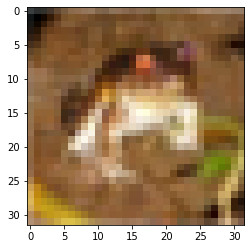

In [654]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [655]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

In [656]:
test_dataset = torchvision.datasets.CIFAR10(root='data', 
                                            train=False, 
                                            transform=transforms.ToTensor(), 
                                            download=False)

In [657]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

In [658]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#### Обучение

In [659]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(device)

cuda:0


In [660]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        x = self.conv_layer(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layer(x)
        return x

net = Net().to(device) #to('cpu')

In [661]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [662]:
%%time
for epoch in range(30):  
    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        n += labels.shape[0]
        
    print('[%d] loss: %.5f' % (epoch + 1, running_loss / n))

print('Training is finished!')

[1] loss: 0.01054
[2] loss: 0.00687
[3] loss: 0.00537
[4] loss: 0.00443
[5] loss: 0.00376
[6] loss: 0.00314
[7] loss: 0.00266
[8] loss: 0.00226
[9] loss: 0.00192
[10] loss: 0.00163
[11] loss: 0.00144
[12] loss: 0.00126
[13] loss: 0.00116
[14] loss: 0.00099
[15] loss: 0.00092
[16] loss: 0.00086
[17] loss: 0.00075
[18] loss: 0.00077
[19] loss: 0.00069
[20] loss: 0.00066
[21] loss: 0.00060
[22] loss: 0.00063
[23] loss: 0.00055
[24] loss: 0.00060
[25] loss: 0.00053
[26] loss: 0.00053
[27] loss: 0.00048
[28] loss: 0.00054
[29] loss: 0.00048
[30] loss: 0.00046
Training is finished!
Wall time: 5min 16s


In [629]:
%%time
for epoch in range(20):  
    running_loss = 0.0
    n = 0
    for i, data in enumerate(train_loader, 0):
        inputs = data[0].to(device)
        labels = data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        n += labels.shape[0]
        
    print('[%d] loss: %.5f' % (epoch + 1, running_loss / n))

print('Training is finished!')

[1] loss: 0.02189
[2] loss: 0.01474
[3] loss: 0.01199
[4] loss: 0.01030
[5] loss: 0.00891
[6] loss: 0.00796
[7] loss: 0.00705
[8] loss: 0.00630
[9] loss: 0.00557
[10] loss: 0.00499
[11] loss: 0.00462
[12] loss: 0.00414
[13] loss: 0.00376
[14] loss: 0.00341
[15] loss: 0.00313
[16] loss: 0.00296
[17] loss: 0.00267
[18] loss: 0.00259
[19] loss: 0.00233
[20] loss: 0.00228
Training is finished!
Wall time: 3min 47s


GroundTruth:    cat  ship  ship plane


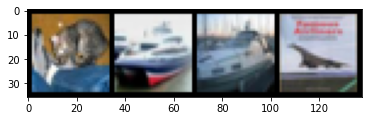

In [671]:
images, labels = iter(test_loader).next()
outputs = net(images.to(device))
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.to('cpu').permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [672]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship   car plane


### 2. 
Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [699]:
linear = nn.Linear(2, 2)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [739]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [701]:
for i in range(500):  
    optimizer.zero_grad()
    pred = linear(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print('[%5d] loss: %.5f' % (i + 1, loss.item()))

print('Training is finished!')
print('y =', y)
print('pred =', pred)

[    1] loss: 0.58303
[  101] loss: 0.00294
[  201] loss: 0.00001
[  301] loss: 0.00000
[  401] loss: 0.00000
Training is finished!
y = tensor([0.1231, 0.2314])
pred = tensor([0.1231, 0.2314], grad_fn=<AddBackward0>)


### 3.
Переписать эту программу на PyTorch: 
Не забудьте про реализацию функции forward! 

In [756]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc_layer = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(128, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc_layer(x)
        return x

In [757]:
net2 = Net2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

In [760]:
x = Variable(torch.randn(1, 28, 28), requires_grad = True)
y = Variable(torch.randint(0, 10, (1,)), requires_grad = False)

In [761]:
for i in range(500):  
    optimizer.zero_grad()
    pred = net2(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print('[%5d] loss: %.5f' % (i + 1, loss.item()))

print('Training is finished!')
print('y =', y)
print('pred =', pred)

[    1] loss: 2.25593
[  101] loss: 2.27372
[  201] loss: 2.24909
[  301] loss: 2.31316
[  401] loss: 2.29555
Training is finished!
y = tensor([7])
pred = tensor([[0.0879, 0.1096, 0.1046, 0.0677, 0.0829, 0.0999, 0.1267, 0.1474, 0.0999,
         0.0735]], grad_fn=<SoftmaxBackward>)
